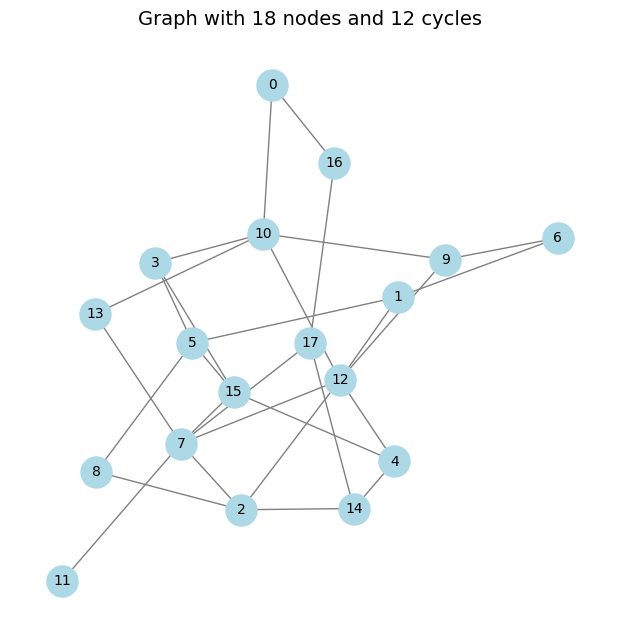

In [3]:
import random
import networkx as nx
import matplotlib.pyplot as plt
import torch
from torch_geometric.data import Data

def generate_graph_with_cycles(min_nodes=15, max_nodes=25, seed=None):
    if seed is not None:
        random.seed(seed)

    n_nodes = random.randint(min_nodes, max_nodes)

    # Generate a connected random graph
    while True:
        p = random.uniform(0.1, 0.3)  # edge probability
        G = nx.erdos_renyi_graph(n_nodes, p)
        if nx.is_connected(G):
            break

    # Count the number of simple cycles using a cycle basis
    cycles = nx.cycle_basis(G)
    num_cycles = len(cycles)

    return G, num_cycles

def visualize_graph(G, num_cycles, layout='spring'):
    plt.figure(figsize=(6, 6))

    # Choose layout
    if layout == 'spring':
        pos = nx.spring_layout(G, seed=42)
    elif layout == 'kamada_kawai':
        pos = nx.kamada_kawai_layout(G)
    else:
        pos = nx.circular_layout(G)

    nx.draw(
        G, pos,
        with_labels=True,
        node_color='lightblue',
        edge_color='gray',
        node_size=500,
        font_size=10
    )

    plt.title(f"Graph with {G.number_of_nodes()} nodes and {num_cycles} cycles", fontsize=14)
    plt.axis('off')
    plt.show()

# Example: generate and visualize 1 graph
G, num_cycles = generate_graph_with_cycles()
visualize_graph(G, num_cycles)


In [7]:
def nx_to_pyg_data(G, num_cycles):
    edge_index = torch.tensor(list(G.edges), dtype=torch.long).t().contiguous()
    if edge_index.numel() == 0:
        return None 
    edge_index = torch.cat([edge_index, edge_index[[1, 0]]], dim=1)
    x = torch.ones((G.number_of_nodes(), 1), dtype=torch.float)
    y = torch.tensor([num_cycles], dtype=torch.long)
    return Data(x=x, edge_index=edge_index, y=y)

pyg_dataset = []
for _ in range(10000):
    G, num_cycles = generate_graph_with_cycles()
    data = nx_to_pyg_data(G, num_cycles)
    if data is not None:
        pyg_dataset.append(data)

print(f"Generated {len(pyg_dataset)} graphs.")
print("Example Data object:", pyg_dataset[0])

Generated 10000 graphs.
Example Data object: Data(x=[16, 1], edge_index=[2, 38], y=[1])


In [10]:
pyg_dataset[2].y

tensor([18])

In [12]:
torch.save(pyg_dataset, 'structural_dataset/synthetic_cycle_dataset.pt')